# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_data=[]
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
        date=(response["dt"])
        country=(response["sys"]["country"])
        lat=(response["coord"]["lat"])
        lng=(response["coord"]["lon"])
        max_temp=(response["main"]["temp_max"])
        humidity=(response["main"]["humidity"])
        clouds=(response["clouds"]["all"])
        wind=(response["wind"]["speed"])
        city_data.append({"City":city,"Date":date,"Country":country,"Latitude":lat,"Longitude":lng,"Max Temperature":max_temp,"Humidity":humidity,"Clouds":clouds,"Wind":wind})
    except:
        print("City not found. Skipping...")
        pass
        


    
    
     
        
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
print(f" Data Retrieved for {cities}")

 Data Retrieved for ['butaritari', 'longyearbyen', 'rikitea', 'georgetown', 'kapaa', 'vaini', 'bredasdorp', 'albany', 'kangalassy', 'saint-philippe', 'east london', 'ilulissat', 'barrow', 'puerto ayora', 'hobart', 'tuktoyaktuk', 'port elizabeth', 'zhigansk', 'avarua', 'solnechnyy', 'husavik', 'rungata', 'sao joao da barra', 'luderitz', 'busselton', 'acapulco', 'nemuro', 'mataura', 'torbay', 'lazo', 'cape town', 'khatanga', 'qena', 'perevoz', 'faya', 'thompson', 'saint anthony', 'ossora', 'jamestown', 'carnarvon', 'tigil', 'nizhneyansk', 'gizo', 'pevek', 'hinton', 'saint george', 'punta arenas', 'severo-kurilsk', 'cabo san lucas', 'norman wells', 'vanavara', 'sur', 'shieli', 'dingle', 'hithadhoo', 'ushuaia', 'harper', 'port alfred', 'san cristobal', 'ribeira grande', 'meulaboh', 'poum', 'katima mulilo', 'shasta lake', 'mar del plata', 'salalah', 'yaan', 'mayor pablo lagerenza', 'kavieng', 'atuona', 'beloha', 'malaya vishera', 'qaanaaq', 'brae', 'belushya guba', 'taolanaro', 'guanambi', 

In [92]:
cities_df=pd.DataFrame(city_data)
cities_df.head()

,City,Date,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind
0,butaritari,1626824170,KI,3.0707,172.7902,82.63,74,69,8.05
1,longyearbyen,1626823901,SJ,78.2186,15.6401,39.04,81,75,3.44
2,rikitea,1626824171,PF,-23.1203,-134.9692,71.87,61,98,22.95
3,georgetown,1626824161,MY,5.4112,100.3354,79.90,87,20,1.99
4,kapaa,1626824171,US,22.0752,-159.3190,84.18,75,75,5.01


In [101]:
# Saving the output to csv
cities_df.to_csv = output_data_file

In [96]:
# Based on this empty return, there are no cities with a humidity level above 100%
humid_df=cities_df.loc[cities_df["Humidity"] > 100]
humid_df

,City,Date,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [97]:
#  Get the indices of cities that have humidity over 100%.
# Skipping this step because we have no cities with humidity over 100%

In [98]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipping this step because we have no humidity outliers

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

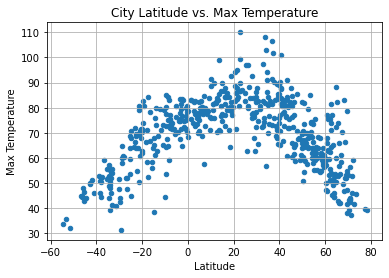

In [99]:
cities_df.plot(x="Latitude",y="Max Temperature",kind="scatter",title="City Latitude vs. Max Temperature",grid=True)
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

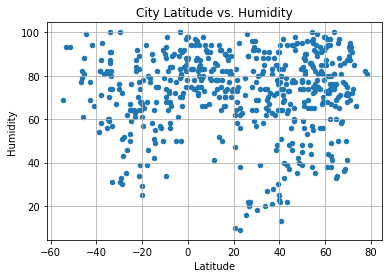

In [78]:
cities_df.plot(x="Latitude",y="Humidity",kind="scatter",title="City Latitude vs. Humidity",grid=True)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

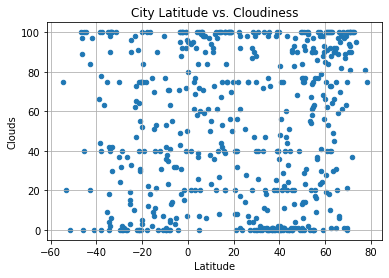

In [79]:
cities_df.plot(x="Latitude",y="Clouds",kind="scatter",title="City Latitude vs. Cloudiness",grid=True)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

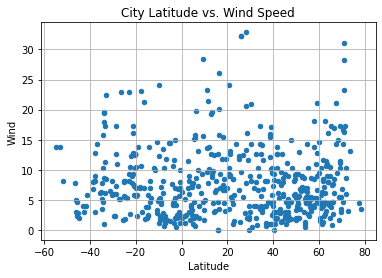

In [80]:
cities_df.plot(x="Latitude",y="Wind",kind="scatter",title="City Latitude vs. Wind Speed",grid=True)
plt.savefig("../output_data/Fig4.png")
plt.show()

In [102]:
Northern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) > 0, :]
Southern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) < 0, :]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6456555884867539
The r-value suggests a negative correlation
In the northern hemisphere,data suggests that temperature seems to be lower as you move away from the equator


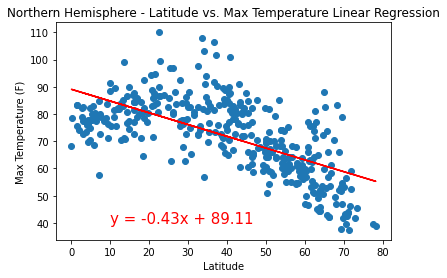

In [113]:
# Defining x and y values
x= pd.to_numeric(Northern_df['Latitude']).astype(float)
y= pd.to_numeric(Northern_df['Max Temperature']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Latitude vs. Max Temperature Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a negative correlation")
print("In the northern hemisphere,data suggests that temperature seems to be lower as you move away from the equator")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


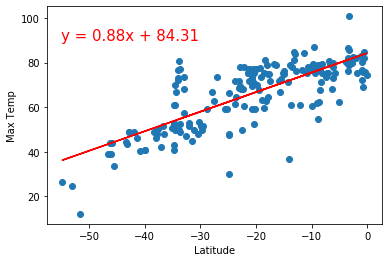

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


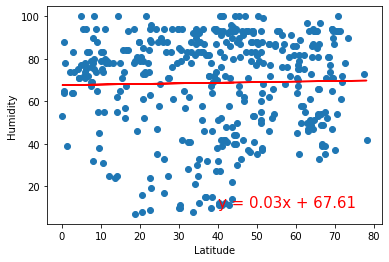

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


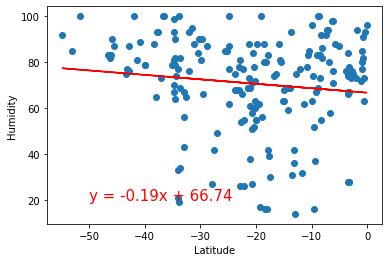

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


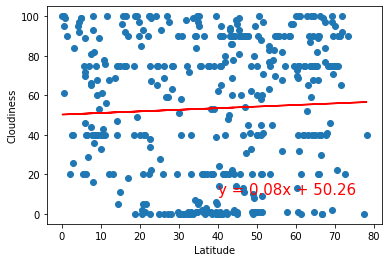

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


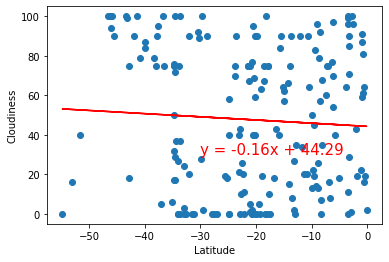

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


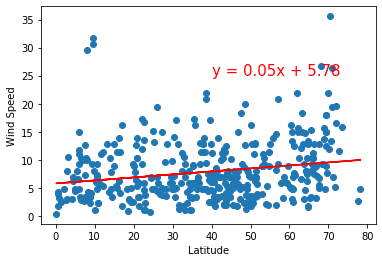

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


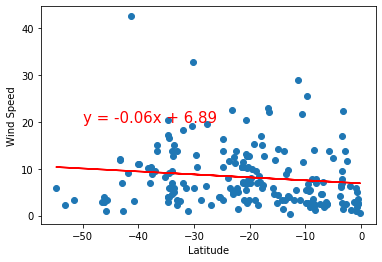